# Data Visualisation in Jupyter/Python


Data viz is a big topic with a lot of libraries available to help. Some of the best are:

 - Matplotlib - this is the most common library on which a number of other visualisation libraries are built. It has a steep-ish learning curve but is very versatile. It is also well integrated with pandas.
 - Seaborn - statistical plotting library built on matplotlib with prettier defaults
 - Bokeh - plotting library with a focus on interactivity
 - Plotly - declarative, plotting framework with support for a variety of languages (python, javascript, R) and applicable to a number of different use cases - jupter notebooks, scripts, web frontends etc.
 
For today we'll stick to the basics in matplotlib and the built in options in pandas.

## Time series data

Pandas and matplotlib have great support for timeseries data. Lets load some to try out.

In [1]:
import pandas as pd
import numpy as np

# Note that this loads our data as a dataframe even though the result only has one column (and an index)
df = pd.read_csv('data/tsla_share_price.csv', index_col='Date')
df.head()

,Close
Date,
01/04/2016 16:00,223.41
01/05/2016 16:00,223.43
01/06/2016 16:00,219.04
01/07/2016 16:00,215.65
01/08/2016 16:00,211.00


## Matplotlib Setup and Line Plots

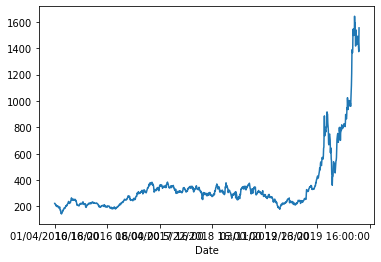

In [2]:
# Some jupyter magic to have our charts automatically show up in our results.
%matplotlib inline


# We can plot a series with a datetime axis just by calling plot() on it!
df['Close'].plot() # Oh man, should have bought tesla stock...

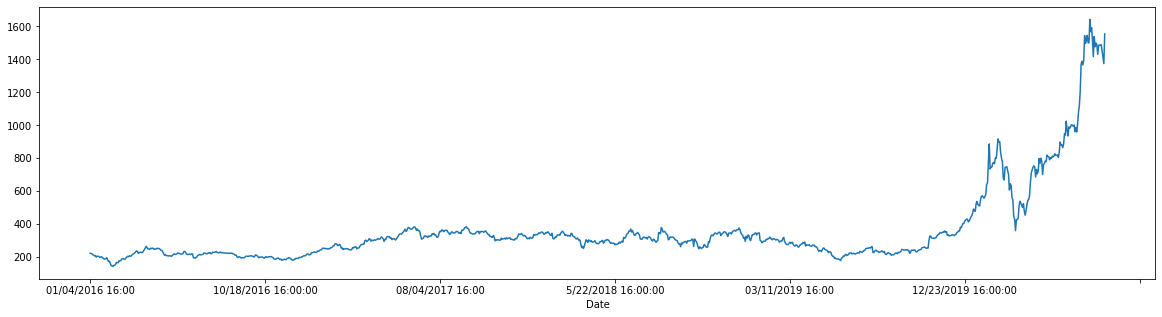

In [3]:
# The default arguments to a good job here but we can make our chart a bit bigger with some extra arguments.

df['Close'].plot(figsize=(20,5))

## Bar Charts

Lets plot a bar chart showing the nunber of title by type in our data.

In [5]:
# Load our imdb data
df_imdb = pd.read_csv('data/imdb_clean.csv')

# Get the number of values of each type with value_counts()
df_imdb['titleType'].value_counts()

movie           235005
tvEpisode       213290
short           117291
tvSeries         67890
video            53844
tvMovie          41575
videoGame        10777
tvMiniSeries      9901
tvSpecial         8933
tvShort           3190
Name: titleType, dtype: int64

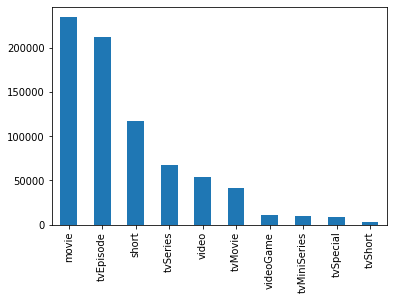

In [6]:
# The default plot type when calling plot is a line plot but we can overide this.
df_imdb['titleType'].value_counts().plot(kind='bar')

Lets see how the number of movies released per year changed over time

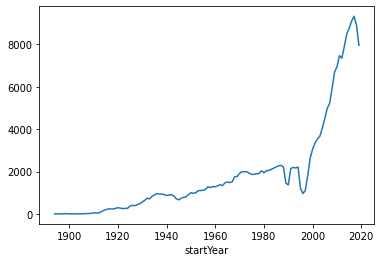

In [7]:
# Create a slice of our dataframe featuring just movies up to 2019 (to ignore the current incomplete year)
df_movies = df_imdb.loc[(df_imdb['titleType'] == 'movie') & (df_imdb['startYear'] < 2020)]

# plot the number of titles by year.
df_movies.groupby('startYear').size().plot()

## Matplotlib Figures and Sublots

In the above we've just used the plot() method on dataframes and series objects. We can use matplotlib.pyplot to make this a bit more customised.

Matlotlib divides charts into Figures (an overall container including titles, axes, etc.) and subplots (one or more areas where data is actually plotted).

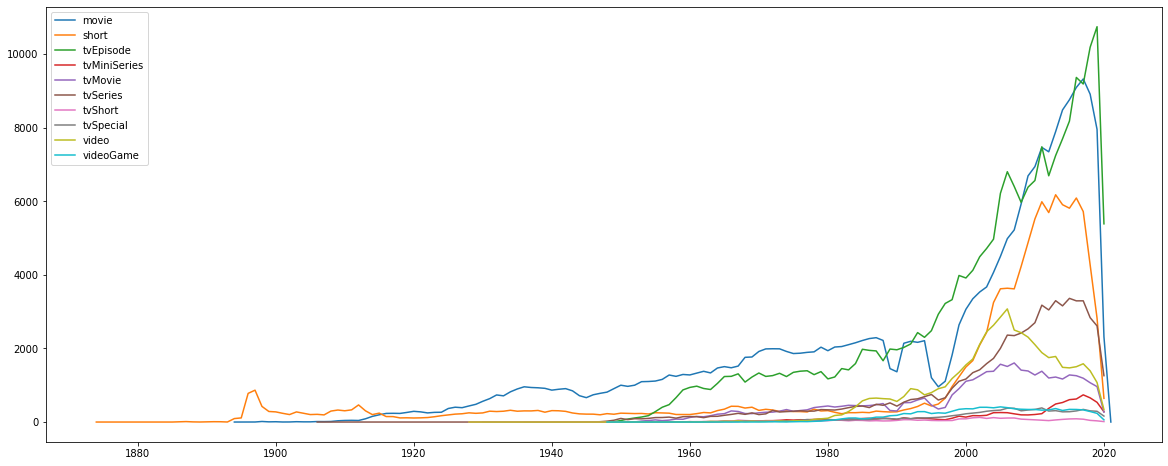

In [8]:
import matplotlib.pyplot as plt # A common convention.

# Create a figure and a subplot (which we call ax by convention)
fig, ax = plt.subplots(figsize=(20,8))


# We can iterate over a grouper to generate mutiple plot traces.
for name, data in df_imdb.groupby(['titleType']):

    # Generate a series of yearly title numbers
    yearly_counts = data.groupby('startYear').size()

    # plot this data on the subplot
    ax.plot(
        yearly_counts.index,  # Our x values come from the series index
        yearly_counts, # The series values are our y values
        label=name # The label for this data is the group name
    )

ax.legend()
plt.show()

## Excercise: Plot the average rating for each Simpsons episode!

As a guide you might want to break this down into steps:

- First get a dataframe with just the simpsones episodes.
- Generate a string column for the season and episode number together e.g. S01-E01
- Generate a plot with the data for each episode.

In [9]:
# Generate Dataframe

In [12]:
# Generate a string for the season and episode numbers.

NameError: name 'X_AXIS_VALUES_HERE' is not defined

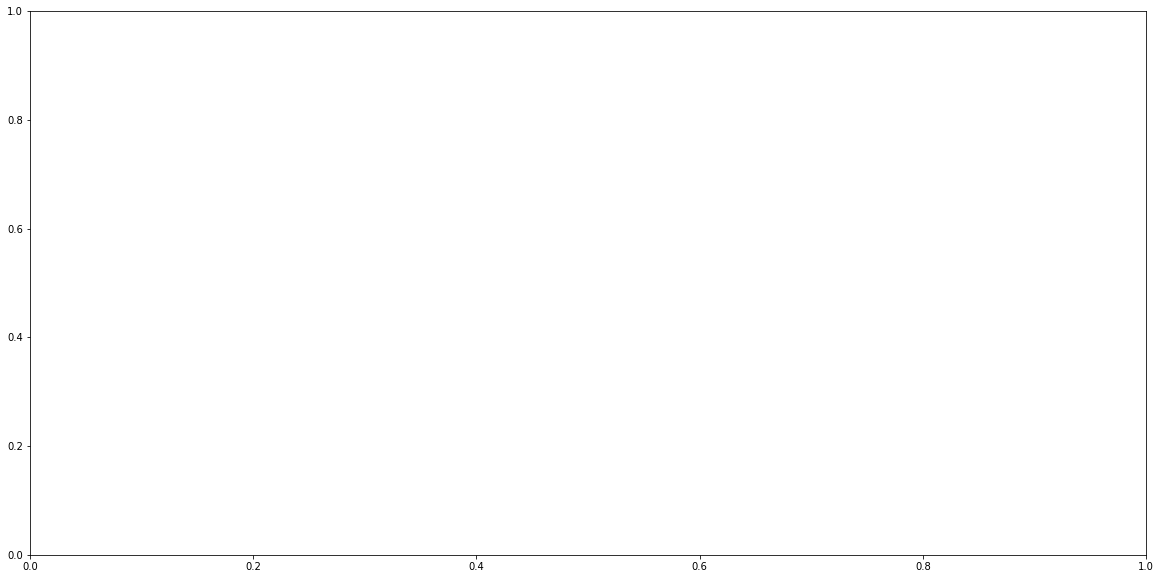

In [11]:
# Generate a plot. I've initialised the figure and axes already and left some blanks to fill in.
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(
    X_AXIS_VALUES_HERE, # << Change this line!
    Y_AXIS_VALUES_HERE, # << Change this line!
)


ax.set_title("Simpsons Episode Ratings by Episode")

plt.show()